In [61]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
import numpy as np
import matplotlib.pyplot as plt



In [62]:
df_combined22 = pd.read_csv('2022Total.csv')
df_combined23 = pd.read_csv('2023Total.csv')
df_combined = pd.read_csv('2024Total.csv')
df_combined25 = pd.read_csv('2025Total.csv')

In [63]:
df_combined22 = df_combined22[['Goalie','Team','Date','Games','xGAE','Result','Impact']]
df_impact_totals22 = df_combined22.groupby(['Goalie', 'Team','Impact']).size().unstack(fill_value=0)
df_impact_totals22['Year'] = '2021-22'
columns_to_sum = ['Bad in Win', 'Goalie Loss', 'Goalie Win', 'No Impact', 'Strong in Loss']  # Replace with your column names
df_impact_totals22['Games'] = df_impact_totals22[columns_to_sum].sum(axis=1)
df_impact_totals22 = df_impact_totals22[['Year','Games','Goalie Win','Goalie Loss','Strong in Loss','Bad in Win','No Impact']]
df_combined23 = df_combined23[['Goalie','Team','Date','Games','xGAE','Result','Impact']]
df_impact_totals23 = df_combined23.groupby(['Goalie', 'Team','Impact']).size().unstack(fill_value=0)
df_impact_totals23['Year'] = '2022-23'
columns_to_sum = ['Bad in Win', 'Goalie Loss', 'Goalie Win', 'No Impact', 'Strong in Loss']  # Replace with your column names
df_impact_totals23['Games'] = df_impact_totals23[columns_to_sum].sum(axis=1)
df_impact_totals23 = df_impact_totals23[['Year','Games','Goalie Win','Goalie Loss','Strong in Loss','Bad in Win','No Impact']]
df_combined = df_combined[['Goalie','Team','Date','Games','xGAE','Result','Impact']]
df_impact_totals = df_combined.groupby(['Goalie', 'Team','Impact']).size().unstack(fill_value=0)
df_impact_totals['Year'] = '2023-24'
columns_to_sum = ['Bad in Win', 'Goalie Loss', 'Goalie Win', 'No Impact', 'Strong in Loss']  # Replace with your column names
df_impact_totals['Games'] = df_impact_totals[columns_to_sum].sum(axis=1)
df_impact_totals = df_impact_totals[['Year','Games','Goalie Win','Goalie Loss','Strong in Loss','Bad in Win','No Impact']]
df_combined25 = df_combined25[['Goalie','Team','Date','Games','xGAE','Result','Impact']]
df_impact_totals25 = df_combined25.groupby(['Goalie', 'Team','Impact']).size().unstack(fill_value=0)
df_impact_totals25['Year'] = '2024-25'
columns_to_sum = ['Bad in Win', 'Goalie Loss', 'Goalie Win', 'No Impact', 'Strong in Loss']  # Replace with your column names
df_impact_totals25['Games'] = df_impact_totals25[columns_to_sum].sum(axis=1)
df_impact_totals25 = df_impact_totals25[['Year','Games','Goalie Win','Goalie Loss','Strong in Loss','Bad in Win','No Impact']]

In [64]:
df_impact = pd.concat ([df_impact_totals,df_impact_totals23,df_impact_totals22,df_impact_totals25], axis=0)
df_impact = df_impact.fillna(0)
df_impact = df_impact.applymap(lambda x: int(x) if isinstance(x, float) and x.is_integer() else x)



In [65]:
df_combined25w = df_combined25[df_combined25['xGAE'] > 0]
df_combined25w = df_combined25w.sort_values(by='xGAE', ascending=False).head(11)
df_combined25l = df_combined25[df_combined25['xGAE'] < 0]
df_combined25l = df_combined25l.sort_values(by='xGAE', ascending=True).head(11)


In [66]:
df_sortedw23 = df_impact_totals23.sort_values(by='Goalie Win', ascending=False)
df_sortedw24 = df_impact_totals.sort_values(by='Goalie Win', ascending=False)
df_filteredl24 = df_impact_totals[df_impact_totals['Games'] > 24]
df_sortedl24 = df_filteredl24.sort_values(by='Goalie Loss', ascending=True)
df_filteredl23 = df_impact_totals23[df_impact_totals23['Games'] > 24]
df_sortedl23 = df_filteredl23.sort_values(by='Goalie Loss', ascending=True)
df_sortedw22 = df_impact_totals22.sort_values(by='Goalie Win', ascending=False)
df_filteredl22 = df_impact_totals22[df_impact_totals22['Games'] > 24]
df_sortedl22 = df_filteredl22.sort_values(by='Goalie Loss', ascending=True)
df_sortedw25 = df_impact_totals25.sort_values(by='Goalie Win', ascending=False)
df_filteredl25 = df_impact_totals25[df_impact_totals25['Games'] > 0]
df_sortedl25 = df_filteredl25.sort_values(by='Goalie Loss', ascending=True)



In [67]:
win22_df = df_sortedw22[['Year','Goalie Win']].head(11)
loss22_df = df_sortedl22[['Year','Goalie Loss']].head(11)
win23_df = df_sortedw23[['Year','Goalie Win']].head(11)
loss23_df = df_sortedl23[['Year','Goalie Loss']].head(11)
win24_df = df_sortedw24[['Year','Goalie Win']].head(11)
loss24_df = df_sortedl24[['Year','Goalie Win']].head(11)
win25_df = df_sortedw25[['Year','Goalie Win']].head(11)
loss25_df = df_sortedl25[['Year','Goalie Loss']].head(11)



In [68]:
filtered_df = df_combined25[df_combined25['Date'] == '2024-10-10']
filtered_df = filtered_df[['Goalie','Team','Date','Games','xGAE','Result','Impact']]


In [69]:
df_combined['Date'] = pd.to_datetime(df_combined['Date'])
df_combined['Date'] = df_combined['Date'].dt.strftime('%B %d, %Y')
df_combined23['Date'] = pd.to_datetime(df_combined23['Date'])
df_combined23['Date'] = df_combined23['Date'].dt.strftime('%B %d, %Y')
df_combined22['Date'] = pd.to_datetime(df_combined22['Date'])
df_combined22['Date'] = df_combined22['Date'].dt.strftime('%B %d, %Y')
df_combined25['Date'] = pd.to_datetime(df_combined25['Date'])
df_combined25['Date'] = df_combined25['Date'].dt.strftime('%B %d, %Y')
df_combinedt = pd.concat([df_combined,df_combined23,df_combined22,df_combined25],axis=0)
df_combinedt = df_combinedt[['Goalie','Team','Date','Games','xGAE','Result','Impact']]

In [70]:
df_combinedt

,Goalie,Team,Date,Games,xGAE,Result,Impact
0,John Gibson,ANA,"October 14, 2023",ANA at VGK,0.47,L,Strong in Loss
1,John Gibson,ANA,"October 19, 2023",DAL at ANA,-0.09,L,No Impact
2,John Gibson,ANA,"October 22, 2023",BOS at ANA,0.71,L,Strong in Loss
3,John Gibson,ANA,"October 26, 2023",ANA at BOS,-0.15,W,Bad in Win
4,John Gibson,ANA,"October 30, 2023",ANA at PIT,0.21,W,No Impact
...,...,...,...,...,...,...,...
35,Scott Wedgewood,NSH,"October 10, 2024",DAL at NSH,-2.14,L,Goalie Loss
36,Elvis Merzlikins,CBJ,"October 10, 2024",CBJ at MIN,-0.79,L,No Impact
37,Filip Gustavsson,MIN,"October 10, 2024",CBJ at MIN,0.54,W,No Impact
38,Joel Hofer,STL,"October 10, 2024",STL at S.J,-1.32,W,Bad in Win


In [71]:
darcykuemper22_df = df_combined22[df_combined22['Goalie'] == 'Darcy Kuemper']
column_sum = darcykuemper22_df['xGAE'].sum()
darcykuemper22_df = pd.DataFrame({'xGAE 2022': [column_sum]})
darcykuemper22_df['Goalie'] = 'Darcy Kuemper'
darcykuemper22_df = darcykuemper22_df[['Goalie','xGAE 2022']]
darcykuemper23_df = df_combined23[df_combined23['Goalie'] == 'Darcy Kuemper']
column_sum = darcykuemper23_df['xGAE'].sum()
darcykuemper23_df = pd.DataFrame({'xGAE 2023': [column_sum]})
darcykuemper23_df['Goalie'] = 'Darcy Kuemper'
darcykuemper23_df = darcykuemper23_df[['Goalie','xGAE 2023']]
darcykuemper_df = df_combined[df_combined['Goalie'] == 'Darcy Kuemper']
column_sum = darcykuemper_df['xGAE'].sum()
darcykuemper_df = pd.DataFrame({'xGAE 2024': [column_sum]})
darcykuemper_df['Goalie'] = 'Darcy Kuemper'
darcykuemper_df = darcykuemper_df[['Goalie','xGAE 2024']]
darcykuemper25_df = df_combined25[df_combined25['Goalie'] == 'Darcy Kuemper']
column_sum = darcykuemper25_df['xGAE'].sum()
darcykuemper25_df = pd.DataFrame({'xGAE 2025': [column_sum]})
darcykuemper25_df['Goalie'] = 'Darcy Kuemper'
darcykuemper25_df = darcykuemper25_df[['Goalie','xGAE 2025']]
darcykuempertotal_df = pd.concat ([darcykuemper22_df,darcykuemper23_df,darcykuemper_df,darcykuemper25_df], axis=0)
darcykuempertotal_df = darcykuempertotal_df.groupby('Goalie').sum().reset_index()


In [72]:
adinhill22_df = df_combined22[df_combined22['Goalie'] == 'Adin Hill']
column_sum = adinhill22_df['xGAE'].sum()
adinhill22_df = pd.DataFrame({'xGAE 2022': [column_sum]})
adinhill22_df['Goalie'] = 'Adin Hill'
adinhill22_df = adinhill22_df[['Goalie','xGAE 2022']]
adinhill23_df = df_combined23[df_combined23['Goalie'] == 'Adin Hill']
column_sum = adinhill23_df['xGAE'].sum()
adinhill23_df = pd.DataFrame({'xGAE 2023': [column_sum]})
adinhill23_df['Goalie'] = 'Adin Hill'
adinhill23_df = adinhill23_df[['Goalie','xGAE 2023']]
adinhill_df = df_combined[df_combined['Goalie'] == 'Adin Hill']
column_sum = adinhill_df['xGAE'].sum()
adinhill_df = pd.DataFrame({'xGAE 2024': [column_sum]})
adinhill_df['Goalie'] = 'Adin Hill'
adinhill_df = adinhill_df[['Goalie','xGAE 2024']]
adinhill25_df = df_combined25[df_combined25['Goalie'] == 'Adin Hill']
column_sum = adinhill25_df['xGAE'].sum()
adinhill25_df = pd.DataFrame({'xGAE 2025': [column_sum]})
adinhill25_df['Goalie'] = 'Adin Hill'
adinhill25_df = adinhill25_df[['Goalie','xGAE 2025']]
adinhilltotal_df = pd.concat ([adinhill22_df,adinhill23_df,adinhill_df,adinhill25_df], axis=0)
adinhilltotal_df = adinhilltotal_df.groupby('Goalie').sum().reset_index()


In [77]:
anthonystolarz22_df = df_combined22[df_combined22['Goalie'] == 'Anthony Stolarz']
column_sum = anthonystolarz22_df['xGAE'].sum()
anthonystolarz22_df = pd.DataFrame({'xGAE 2022': [column_sum]})
anthonystolarz22_df['Goalie'] = 'Anthony Stolarz'
anthonystolarz22_df = anthonystolarz22_df[['Goalie','xGAE 2022']]
anthonystolarz23_df = df_combined23[df_combined23['Goalie'] == 'Anthony Stolarz']
column_sum = anthonystolarz23_df['xGAE'].sum()
anthonystolarz23_df = pd.DataFrame({'xGAE 2023': [column_sum]})
anthonystolarz23_df['Goalie'] = 'Anthony Stolarz'
anthonystolarz23_df = anthonystolarz23_df[['Goalie','xGAE 2023']]
anthonystolarz_df = df_combined[df_combined['Goalie'] == 'Anthony Stolarz']
column_sum = anthonystolarz_df['xGAE'].sum()
anthonystolarz_df = pd.DataFrame({'xGAE 2024': [column_sum]})
anthonystolarz_df['Goalie'] = 'Anthony Stolarz'
anthonystolarz_df = anthonystolarz_df[['Goalie','xGAE 2024']]
anthonystolarz25_df = df_combined25[df_combined25['Goalie'] == 'Anthony Stolarz']
column_sum = anthonystolarz25_df['xGAE'].sum()
anthonystolarz25_df = pd.DataFrame({'xGAE 2025': [column_sum]})
anthonystolarz25_df['Goalie'] = 'Anthony Stolarz'
anthonystolarz25_df = anthonystolarz25_df[['Goalie','xGAE 2025']]
anthonystolarztotal_df = pd.concat ([anthonystolarz22_df,anthonystolarz23_df,anthonystolarz_df,anthonystolarz25_df], axis=0)
anthonystolarztotal_df = anthonystolarztotal_df.groupby('Goalie').sum().reset_index()


In [86]:
calvinpickard22_df = df_combined22[df_combined22['Goalie'] == 'Calvin Pickard']
column_sum = calvinpickard22_df['xGAE'].sum()
calvinpickard22_df = pd.DataFrame({'xGAE 2022': [column_sum]})
calvinpickard22_df['Goalie'] = 'Calvin Pickard'
calvinpickard22_df = calvinpickard22_df[['Goalie','xGAE 2022']]
calvinpickard23_df = df_combined23[df_combined23['Goalie'] == 'Calvin Pickard']
column_sum = calvinpickard23_df['xGAE'].sum()
calvinpickard23_df = pd.DataFrame({'xGAE 2023': [column_sum]})
calvinpickard23_df['Goalie'] = 'Calvin Pickard'
calvinpickard23_df = calvinpickard23_df[['Goalie','xGAE 2023']]
calvinpickard_df = df_combined[df_combined['Goalie'] == 'Calvin Pickard']
column_sum = calvinpickard_df['xGAE'].sum()
calvinpickard_df = pd.DataFrame({'xGAE 2024': [column_sum]})
calvinpickard_df['Goalie'] = 'Calvin Pickard'
calvinpickard_df = calvinpickard_df[['Goalie','xGAE 2024']]
calvinpickard25_df = df_combined25[df_combined25['Goalie'] == 'Calvin Pickard']
column_sum = calvinpickard25_df['xGAE'].sum()
calvinpickard25_df = pd.DataFrame({'xGAE 2025': [column_sum]})
calvinpickard25_df['Goalie'] = 'Calvin Pickard'
calvinpickard25_df = calvinpickard25_df[['Goalie','xGAE 2025']]
calvinpickardtotal_df = pd.concat ([calvinpickard22_df,calvinpickard23_df,calvinpickard_df,calvinpickard25_df], axis=0)
calvinpickardtotal_df = calvinpickardtotal_df.groupby('Goalie').sum().reset_index()


In [87]:
camtalbot22_df = df_combined22[df_combined22['Goalie'] == 'Cam Talbot']
column_sum = camtalbot22_df['xGAE'].sum()
camtalbot22_df = pd.DataFrame({'xGAE 2022': [column_sum]})
camtalbot22_df['Goalie'] = 'Cam Talbot'
camtalbot22_df = camtalbot22_df[['Goalie','xGAE 2022']]
camtalbot23_df = df_combined23[df_combined23['Goalie'] == 'Cam Talbot']
column_sum = camtalbot23_df['xGAE'].sum()
camtalbot23_df = pd.DataFrame({'xGAE 2023': [column_sum]})
camtalbot23_df['Goalie'] = 'Cam Talbot'
camtalbot23_df = camtalbot23_df[['Goalie','xGAE 2023']]
camtalbot_df = df_combined[df_combined['Goalie'] == 'Cam Talbot']
column_sum = camtalbot_df['xGAE'].sum()
camtalbot_df = pd.DataFrame({'xGAE 2024': [column_sum]})
camtalbot_df['Goalie'] = 'Cam Talbot'
camtalbot_df = camtalbot_df[['Goalie','xGAE 2024']]
camtalbot25_df = df_combined25[df_combined25['Goalie'] == 'Cam Talbot']
column_sum = camtalbot25_df['xGAE'].sum()
camtalbot25_df = pd.DataFrame({'xGAE 2025': [column_sum]})
camtalbot25_df['Goalie'] = 'Cam Talbot'
camtalbot25_df = camtalbot25_df[['Goalie','xGAE 2025']]
camtalbottotal_df = pd.concat ([camtalbot22_df,camtalbot23_df,camtalbot_df,camtalbot25_df], axis=0)
camtalbottotal_df = camtalbottotal_df.groupby('Goalie').sum().reset_index()
camtalbottotal_df

,Goalie,xGAE 2022,xGAE 2023,xGAE 2024,xGAE 2025
0,Cam Talbot,-17.67,-2.35,10.35,-0.39


In [82]:

arturssilovs23_df = df_combined23[df_combined23['Goalie'] == 'Arturs Silovs']
column_sum = arturssilovs23_df['xGAE'].sum()
arturssilovs23_df = pd.DataFrame({'xGAE 2023': [column_sum]})
arturssilovs23_df['Goalie'] = 'Arturs Silovs'
arturssilovs23_df = arturssilovs23_df[['Goalie','xGAE 2023']]
arturssilovs_df = df_combined[df_combined['Goalie'] == 'Arturs Silovs']
column_sum = arturssilovs_df['xGAE'].sum()
arturssilovs_df = pd.DataFrame({'xGAE 2024': [column_sum]})
arturssilovs_df['Goalie'] = 'Arturs Silovs'
arturssilovs_df = arturssilovs_df[['Goalie','xGAE 2024']]
arturssilovs25_df = df_combined25[df_combined25['Goalie'] == 'Arturs Silovs']
column_sum = arturssilovs25_df['xGAE'].sum()
arturssilovs25_df = pd.DataFrame({'xGAE 2025': [column_sum]})
arturssilovs25_df['Goalie'] = 'Arturs Silovs'
arturssilovs25_df = arturssilovs25_df[['Goalie','xGAE 2025']]
arturssilovstotal_df = pd.concat ([arturssilovs22_df,arturssilovs23_df,arturssilovs_df,arturssilovs25_df], axis=0)
arturssilovstotal_df = arturssilovstotal_df.groupby('Goalie').sum().reset_index()


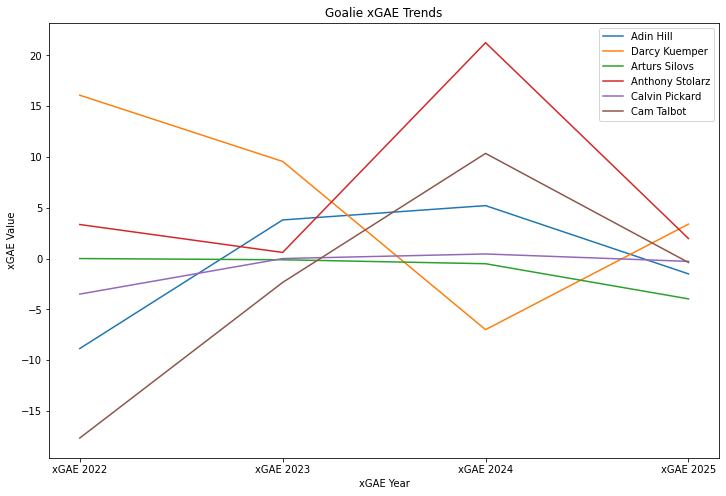

In [90]:
goalietotal_df = pd.concat ([adinhilltotal_df,darcykuempertotal_df,arturssilovstotal_df,anthonystolarztotal_df,
                            calvinpickardtotal_df,camtalbottotal_df], axis=1)
# Create a line chart
plt.figure(figsize=(12, 8))

# Iterate over each goalie
for index, goalie in goalietotal_df.iterrows():
    plt.plot(
        ['xGAE 2022', 'xGAE 2023', 'xGAE 2024', 'xGAE 2025'],
        [goalie['xGAE 2022'], goalie['xGAE 2023'], goalie['xGAE 2024'], goalie['xGAE 2025']],
        label=goalie['Goalie']
        
    )

# Add labels and title
plt.xlabel('xGAE Year')
plt.ylabel('xGAE Value')
plt.title('Goalie xGAE Trends')

# Add legend
plt.legend()

# Show the plot
plt.show()

In [91]:
goalietotal_df

,Goalie,xGAE 2022,xGAE 2023,xGAE 2024,xGAE 2025,Goalie,xGAE 2022,xGAE 2023,xGAE 2024,xGAE 2025,...,Goalie,xGAE 2022,xGAE 2023,xGAE 2024,xGAE 2025,Goalie,xGAE 2022,xGAE 2023,xGAE 2024,xGAE 2025
0,Adin Hill,-8.86,3.8,5.21,-1.51,Darcy Kuemper,16.08,9.56,-7.0,3.39,...,Calvin Pickard,-3.5,0.0,0.45,-0.28,Cam Talbot,-17.67,-2.35,10.35,-0.39
